# NYC MTA Turnstile Usage Data Challenge

###### Michael Weil
###### michaw07@gmail.com

This notebook runs on Python 3. Please make sure that these modules below are installed and updated.

In [2]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None 
import urllib.request as ul
from bs4 import BeautifulSoup
import re
import datetime
from datetime import date, timedelta as td,datetime as dt
import matplotlib.pyplot as plt
from difflib import SequenceMatcher as sm
import folium
from sklearn.preprocessing import normalize
from ipywidgets import widgets
from IPython.display import display

%matplotlib inline  

## Description
The MTA Data Challenge is about turnstile-devices in each station in the NYC Subway System. 

The project will be divided into three parts : 
1. Data Analysis
2. Visualization
3. Bonus : Visualization on a map


# 1. Data Analysis

## Question 1 : Which station has the most number of units?

To answer this question, we will exploit the *Remote Unit/Control Area/Station Name Key* dataset. The data are displayed below.

In [28]:
# Load the Remote Unit/Control Area/Station Name Key dataset

# Data's URL 
url_booth="http://web.mta.info/developers/resources/nyct/turnstile/Remote-Booth-Station.xls"

# Load the data and read in a Pandas DataFrame
booth_xls=ul.urlopen(url_booth,timeout=5)
data_booth = pd.read_excel(booth_xls)
data_booth

,Remote,Booth,Station,Line Name,Division
0,R001,A060,WHITEHALL ST,R1,BMT
1,R001,A058,WHITEHALL ST,R1,BMT
2,R001,R101S,SOUTH FERRY,R1,IRT
3,R002,A077,FULTON ST,ACJZ2345,BMT
4,R002,A081,FULTON ST,ACJZ2345,BMT
5,R002,A082,FULTON ST,ACJZ2345,BMT
6,R003,J025,CYPRESS HILLS,J,BMT
7,R004,J028,ELDERTS LANE,JZ,BMT
8,R005,J030,FOREST PARKWAY,J,BMT
9,R006,J031,WOODHAVEN BLVD,JZ,BMT


The *units* mentionned in the question refers to the Remote units in the data. Remote units record the entries and the exits of given turnstiles. Stations may be monitored by many Remote units. Each remote unit may be associated with different stations (example : R001 for WHITEHALL & SOUTH FERRY), but most of the time they are related to a unique station.

If we count the number of unique units per station we get the following.

In [46]:
# Count the number of unique units for each station.
group_remote=data_booth.groupby("Station").Remote
group_remote.nunique().order(ascending=False)

Station
86 ST              5
CANAL ST           5
34 ST-PENN STA     4
42 ST-GRD CNTRL    4
FULTON ST          4
125 ST             4
VAN SICLEN AVE     3
PROSPECT AVE       3
18 AVE             3
50 ST              3
LEXINGTON AVE      3
KINGS HIGHWAY      3
96 ST              3
145 ST             3
AVE U              3
FT HAMILTON PKY    3
59 ST              3
23 ST              3
116 ST             3
CHURCH AVE         3
CHAMBERS ST        3
103 ST             3
PARK PLACE         2
36 ST              2
METROPOLITAN AV    2
42 ST-TIMES SQ     2
MYRTLE AVE         2
23 ST-6 AVE        2
42 ST-PA BUS TE    2
CHRISTOPHER ST     2
                  ..
LEFFERTS BLVD      1
LGA AIRPORT CTB    1
LIB-HEMPSTEAD      1
LIBERTY AVE        1
LIVONIA AVE        1
LONGWOOD AVE       1
MAIN ST            1
JFK HOWARD BCH     1
JAMAICA-VAN WYC    1
GRAND-30 AVE       1
HOWARD BCH-JFK     1
GRANT AVE          1
GREENPOINT AVE     1
GREENWOOD-111      1
GROVE STREET       1
HARRISON           1
HEWES

The station monitored by the most remote units are 86 ST & CANAL ST with 5 remotes. These two stations are indeed very *active*, however we expected bigger stations such as Times Squares or Grand Central. There is a simple reason for this : ** SOME STATIONS HAVE THE SAME NAME **. 

For example, there is two CANAL ST : one on the West Side (Red Line) and one on the East Side (Green Line). It is the same case for 86 ST. This links enumerates the list of stations with the same name : https://en.wikipedia.org/wiki/List_of_New_York_City_Subway_stations#Stations_with_the_same_name

Some shared-name stations like the *PENN STATIONS* are pretty closed each other that we can regard them as one unique station.

What to do then? We can group the data by the lines name in addition to the station name. The result is : 

In [47]:
group_remote_with_line=data_booth.groupby(["Station","Line Name"]).Remote
group_remote_with_line.nunique().order(ascending=False)

Station          Line Name  
42 ST-GRD CNTRL  4567S          4
CANAL ST         JNQRZ6         3
25 ST            R              2
HOYT ST          23             2
42 ST-PA BUS TE  ACENQRS1237    2
FULTON ST        2345ACJZ       2
                 ACJZ2345       2
BOWLING GREEN    45             2
42 ST-TIMES SQ   1237ACENQRS    2
34 ST-PENN STA   ACE            2
LEXINGTON AVE    456NQR         2
LEXINGTON-53 ST  EM6            2
34 ST-HERALD SQ  BDFMNQR        2
59 ST            456NQR         2
PROSPECT AVE     R              2
CHRISTOPHER ST   1              2
23 ST-6 AVE      FM             2
9 ST             DFGMNR         1
90 ST-ELMHURST   7              1
9 AVE            D              1
96 ST            6              1
                 123            1
                 BC             1
9TH STREET       1              1
AQUEDUCT TRACK   A              1
ALABAMA AVE      J              1
ALLERTON AVE     25             1
86 ST            N              1
AQUEDUCT-N CNDT  A 

The station having the most number of remotes is now 42 ST-GRD CNTRL, it is not surprising as it is a train station.

Moreover, remotes can control stations on different control areas indicated by the column *Booth* on the dataset. Stations have many booths but each booth is associated with a unique station.

If we count the number of control areas per station we get :

In [33]:
# Count the number of control areas for each station.
group_remote.count().order(ascending=False)

Station
34 ST-PENN STA     14
FULTON ST          12
86 ST              10
42 ST-TIMES SQ      9
CANAL ST            9
23 ST               9
CORTLANDT ST        8
42 ST-GRD CNTRL     8
WALL ST             8
116 ST              6
125 ST              6
59 ST               6
161 ST-YANKEE       6
14 ST-UNION SQ      6
KINGS HIGHWAY       6
CHURCH AVE          5
28 ST               5
50 ST               5
34 ST-HERALD SQ     5
42 ST-PA BUS TE     5
96 ST               5
FT HAMILTON PKY     5
135 ST              5
BERGEN ST           5
CHAMBERS ST         5
145 ST              5
18 AVE              4
33 ST               4
BOROUGH HALL/CT     4
JAY ST-METROTEC     4
                   ..
BEEBE-39 AVE        1
METROCARD BUS 1     1
BROADWAY-ENY        1
CENTRAL AVE         1
METROCARD BUS 2     1
CASTLE HILL AVE     1
METROCARD VAN-1     1
METROCARD VAN-2     1
BUSHWICK AVE        1
BURNSIDE AVE        1
BURKE AVE           1
BUHRE AVE           1
METROCARD VAN-3     1
BRONX PARK EAST     1
MI

Now by taking into account the line names :

In [48]:
# Count the number of control areas for each station and line.
group_remote_with_line.count().order(ascending=False)

Station          Line Name  
42 ST-GRD CNTRL  4567S          8
42 ST-TIMES SQ   1237ACENQRS    8
34 ST-PENN STA   ACE            8
FULTON ST        2345ACJZ       6
                 ACJZ2345       5
CANAL ST         JNQRZ6         5
34 ST-HERALD SQ  BDFMNQR        5
42 ST-PA BUS TE  ACENQRS1237    5
WALL ST          45             4
34 ST-PENN STA   123            4
CORTLANDT ST     1              4
                 R              4
33 ST            6              4
WALL ST          23             4
14 ST-6 AVE      FLM123         4
14 ST-UNION SQ   LNQR456        4
HOUSTON ST       1              4
49 ST-7 AVE      NQR            4
23 ST            6              4
161 ST-YANKEE    BD4            4
59 ST            456NQR         4
46 ST            MR             3
47-50 ST-ROCK    BDFM           3
66 ST-LINCOLN    1              3
FLATBUSH AVE     25             3
86 ST            1              3
51 ST            6              3
42 ST-BRYANT PK  BDFM7          3
FOREST HILLS-71  EF

With the line names, Times Square, Penn Station and Grand Central have both 8 booths, without considering the line names, it is Penn Station with 14 control areas.

As mentioned before, the different *Penn Station*s can be seen as one. So the station with the most number of (non-unique) units is 34 ST-PENN STATION, which is the main intercity railroad station in New York City.

Before going on the next questions, we need to create the dictionaries Remote-->Station Remote-->LineName, Booth-->Station and Booth-->LineName. These dictionnaries will be useful later on, in order to get the station names and the lines names for each row of the turnstile datasets. 

Notice that Remote-->Station and Remote-->LineName seem not relevant as a Remote can rarely be associated with more than one station this dictionary will be used in case the correspondance Booth-->Station or Booth-->LineName fails.

Also, the units on the turnstile datasets can be approximative. For instance, station SOUTH FERRY has the UNIT 101 in the datasets, however its booth unit in the *Remote Unit/Control Area/Station Name Key* data is 101S. This additional letter on the unit is responsible for most of the mismatches. To alleviate these errors we will update the Booth-->Station
 and Booth-->LineName dictionaries.

In [52]:
# Create the Booth-->Station Dictionnary
BoothToStation=data_booth[["Booth","Station"]].groupby(["Booth"]).sum().to_dict()['Station']

# Create the Booth-->LineName Dictionnary
BoothToLineName=data_booth[["Booth","Line Name"]].groupby(["Booth"]).sum().to_dict()['Line Name']



# Add to the dictionaries the same keys minus the last charcter
BoothToStation_old=BoothToStation.copy()
for key in BoothToStation_old.keys():
    BoothToStation[key[:-1]]=BoothToStation[key]
    BoothToLineName[key[:-1]]=BoothToLineName[key]

In [49]:
# Create the Remote-->Station dictionary
RemoteToStation=data_booth.groupby('Remote').first().Station.to_dict()

# Create the Remote-->LineName dictionary
RemoteToLineName=data_booth.groupby('Remote').first()['Line Name'].to_dict()

## Loading & Preprocessing the data

Before dealing with the next questions we are going to explain how to load and clean the data.

### Loading the data

A simple way would be to manually choose the dataset(s) to perform our analysis. But here we are going to use a more *user-friendly* approach by loading a dataset for an interval of two given dates.

To do so, we need to solve an important issue which is data format. Indeed, since 10/18/14, MTA changed the format of its turnstile data : 
- Prior to this date the features are : 
 * C/A = Control Area
 * UNIT = Remote Unit for a station
 * SCP = Subunit Channel Position ( specific address for a device )
 * DATEn = Date (MM-DD-YY)
 * TIMEn = Time (hh:mm:ss) for a recording
 * DESCn = Type of the audit (REGULAR,LOGON)
 * ENTRIESn = Cumulative entry value
 * EXITSn = Cumulative exit value

 There are 8 audits for each device per day, meaning n = 1..8
- Posterior to this date, the format is : 
 * C/A = Control Area
 * UNIT = Remote Unit for a station
 * SCP = Subunit Channel Position ( specific address for a device )
 * DATE = Date (MM-DD-YY)
 * TIME = Time (hh:mm:ss) for a recording
 * DESC = Type of the audit (REGULAR,LOGON)
 * ENTRIES = Cumulative entry value
 * EXITS = Cumulative exit value
 * STATION  = Station name the device is located at
 * LINENAME = Lines that can be boarded at this station
 * DIVISION = Represents the Line originally the station belonged to BMT, IRT, or IND

To pick data between two dates, we need to unify the two different kinds of datasets by having a common nomenclature. Notice that DATEn, TIMEn, DESCn, ENTRIESn & EXITSn are the same as DATE, TIME, DESC, ENTRIES & EXITS, therefore it would be wise to use the latter format. DIVISION is not necessary for our analysis but STATION and LINE NAME are needed. The datasets prior to 10/18/14 don't have this feature, however we can create them thanks to the dictionaries from Question 1.

Hence the final format is :  [C/A, UNIT, SCP, DATE, TIME, DESC, ENTRIES, EXITS, STATION,LINENAME]  

To achieve this format the operations are 
- Prior to 10/18/14 :
 * (DATEn, TIMEn, DESCn, ENTRIESn & EXITSn)-->(DATE, TIME, DESC, ENTRIES & EXITS)
 * Create STATION & LINENAME
- Posterior to 10/18/14 :
 * Remove DIVISION

In order to load the data we need to scrap the urls. We get an array of url suffixes (YYMMDD) with Beautiful Soup and REGEX. 

In [548]:
# Web Scrapping

# URL to scrap
url = "http://web.mta.info/developers/turnstile.html"

# ROOT PATH for each .txt files 
root_url="http://web.mta.info/developers/data/nyct/turnstile/turnstile_"

# THRESHOLD that marks the change of the data nomenclature
threshold = 141018

# Get the list of suffixes using REGEX
url_response=ul.urlopen(url,timeout=5)
path="data/nyct/turnstile/turnstile_(\d\d\d\d\d\d)\.txt"
soup = BeautifulSoup(url_response)
links=[int(re.search(path,link["href"]).group(1)) 
       for link in soup.findAll('a',href = re.compile(path))]
links=np.array(links)[::-1]


linkmax=links[-1]# Max date
linkmin=links[0] #Min date


The next function uses as an input a suffix YYMMDD and return the dataset associated with. It loads the data and performs the operation in order to get the unified format.

In [521]:
# Get data from a .txt file

def get_data(yymmdd):
    
    
    data_url=root_url+str(yymmdd)+".txt" #URL of the .txt file
    print("Downloading : "+data_url)
    try:
        data_txt=ul.urlopen(data_url)      
    except :
        raise AttributeError("Error data not available with such date : "+data_url)
        
    # If data prior to 10/18/14
    if (int(yymmdd)<=threshold):
        
        # Load the data
        header=["C/A","UNIT","SCP","DATE","TIME","DESC","ENTRIES","EXITS"]
        header2=sum([["DATE"+str(i),"TIME"+str(i),
                      "DESC"+str(i),"ENTRIES"+str(i),
                  "EXITS"+str(i)] for i in range(2,9)],[])
        header_new=header+header2
        data_messy=pd.read_csv(data_txt,sep=",",names=header_new)
        
        # Create the columns STATION and LINENAME
        unit=data_messy.UNIT #UNIT
        ca=data_messy["C/A"] #C/A
        
        # Booth-->Station
        data_messy["STATION"]=ca.replace(BoothToStation)
        # Booth-->LineName
        data_messy["LINENAME"]=ca.replace(BoothToLineName)
        
        
        # If traductions failed use the Remote--> dictionaries
        rem=data_messy.loc[data_messy.STATION==data_messy["C/A"],'UNIT']
        
        # Remote-->Station
        data_messy.loc[data_messy.STATION==data_messy["C/A"],"STATION"]=rem.replace(RemoteToStation)
        
        # Remote-->LINENAME
        data_messy.loc[data_messy.LINENAME==data_messy["C/A"],"LINENAME"]=rem.replace(RemoteToLineName)
        
        # Split the SCPn,DATEn,etc.. and merge into the data
        FinalHeader=["C/A","UNIT","SCP","STATION","LINENAME","DATE","TIME","DESC","ENTRIES","EXITS"]
        data=data_messy[FinalHeader]
        
        for i in range(2,9):
            data_to_merge=data_messy[["C/A","UNIT","SCP","STATION",
                    "LINENAME","DATE"+str(i),"TIME"+str(i),
                      "DESC"+str(i),"ENTRIES"+str(i),
                  "EXITS"+str(i)]] 
            data_to_merge.columns=FinalHeader
           
            data=pd.concat([data,data_to_merge])
        
    else:# If data after to 10/18/14
        # Load the data
        data=pd.read_csv(data_txt)
        
        # Drop the DIVISION column 
        data=data.drop(["DIVISION"],1)
        
    # Remove rows with Nan values
    data=data.dropna()
                 
        
        
    return(data)

Next we need to implement a function that gets the data between two given suffixes.

First, we implement a small function that take a string MM-DD-YY(YY) as an input and returns a suffix YYMMDD

In [124]:
# String MM-DD-YY(YY) to suffix YYMMDD
def date_to_int(date):
    try:
        d=dt.strptime(date,'%m-%d-%Y')
    except:
        try :
            d=dt.strptime(date,'%m-%d-%y')
        except:
            raise ValueError ("wrong date : "+date+', must have a MM-DD-YY or MM-DD-YYYY format')
    
    return(int(dt.strftime(d,'%y%m%d')))

The function is the following : 

In [354]:
# Gets the data between two given suffixes
def get_data_from_interval(yymmdd1,yymmdd2):
    assert yymmdd1<=yymmdd2,"The first date must be anterior to the second one"
    assert yymmdd1>=linkmin and yymmdd2>=linkmin and yymmdd1<=linkmax and yymmdd2<=linkmax,"One of the dates not in the MTA data"
    
    # Get the suffixes we need to load the data
    start=np.argwhere(links>=yymmdd1)[0][0]
    end=np.argwhere(links>=yymmdd2)[0][0]
    data_links=links[start:end+1]
    
    # Load the data
    v=np.vectorize(get_data)
    datas=v(data_links).tolist()
    
    # Merge the data
    data=pd.concat(datas)
    
    
    data=data[data.DATE.str[2]=="-"]# Sometimes, the DATE format is not good
    
    # We keep the data between the two dates
    data=data[(data.DATE.apply(date_to_int)<=yymmdd2)&
              (data.DATE.apply(date_to_int)>=yymmdd1)] 
    
      
    return (data)
    

Finally, we implement the function that, given two date strings in fomat 'MM-DD-YYYY', returns the data between  Date1 at 00:00:00 and Date2 at  00:00:00.

In [355]:
# Get data between Date1 at 00:00:00 and Date2 at  00:00:00
def get_data_from_dates(Date1,Date2):
    print("Getting the data")
    try: 
        dt.strptime(Date1,"%m-%d-%Y")
        dt.strptime(Date2,"%m-%d-%Y")
    except :
        raise ValueError ("Error : must enter date in MM-DD-YYYY format") 
    
    # Convert the dates to suffix
    yymmdd1=date_to_int(Date1)
    yymmdd2=date_to_int(Date2)
    
    
    data=get_data_from_interval(yymmdd1,yymmdd2)
    
    # Between Date1 00:00:00 and Date2 00:00:00
    date2=dt.strptime(Date2,'%m-%d-%Y')
    date2=dt.strftime(date2,'%m-%d-%y')
    data=data[(data.TIME=="00:00:00")|(data.DATE!=date2)]
    
    print("Done")
    return(data)

### Preprocessing

After loading the data, we need to make to make adjustments. The main problem to tackle down is the cumulative entries & exits. The turnstiles work indeed like an odometer that record the total counts of entries and exits.

To get the number of entries & exis between two consecutive times is to compute the difference between. However some problems may appear, witness the data below : 

In [181]:
data=get_data(130803)
data=data.sort(["C/A","UNIT","SCP","DATE","TIME"])
data.loc[:,'ENTRIES']=data.loc[:,'ENTRIES'].astype(int)
data.loc[:,'EXITS']=data.loc[:,'EXITS'].astype(int)
data=data.loc[(data['ENTRIES']>0) & (data['EXITS']>0),:]
group=data.groupby(["C/A","UNIT","SCP","STATION","LINENAME"])
t=group.diff().shift(-1)
data.index=np.arange(len(data))
t.index=data.index
data[['intENTRIES','intEXITS']]=t
data[(data.STATION=="PAVONIA/NEWPORT")&(data.SCP=="00-00-01")]


,C/A,UNIT,SCP,STATION,LINENAME,DATE,TIME,DESC,ENTRIES,EXITS,intENTRIES,intEXITS
116502,PTH06,R546,00-00-01,PAVONIA/NEWPORT,1,07-27-13,03:33:13,REGULAR,304157,65846,70,4
116503,PTH06,R546,00-00-01,PAVONIA/NEWPORT,1,07-27-13,07:45:13,REGULAR,304227,65850,327,33
116504,PTH06,R546,00-00-01,PAVONIA/NEWPORT,1,07-27-13,11:57:13,REGULAR,304554,65883,424,30
116505,PTH06,R546,00-00-01,PAVONIA/NEWPORT,1,07-27-13,16:09:13,REGULAR,304978,65913,410,62
116506,PTH06,R546,00-00-01,PAVONIA/NEWPORT,1,07-27-13,20:21:13,REGULAR,305388,65975,301,100
116507,PTH06,R546,00-00-01,PAVONIA/NEWPORT,1,07-28-13,00:33:13,REGULAR,305689,66075,32,16
116508,PTH06,R546,00-00-01,PAVONIA/NEWPORT,1,07-28-13,04:45:13,REGULAR,305721,66091,77,4
116509,PTH06,R546,00-00-01,PAVONIA/NEWPORT,1,07-28-13,08:57:13,REGULAR,305798,66095,349,26
116510,PTH06,R546,00-00-01,PAVONIA/NEWPORT,1,07-28-13,13:09:13,REGULAR,306147,66121,324,60
116511,PTH06,R546,00-00-01,PAVONIA/NEWPORT,1,07-28-13,17:21:13,REGULAR,306471,66181,259,117


These data above show the reports of the turnstile 00-00-01 of the PAVONIA/NEWPORT station between 07-27-13 and 08-02-13. Here we created two columns : intENTRIES & intEXITS. These columns correspond to the number of entries and exits between this row and the next row.

Anomalies can be seen. At line 116533, the numbers of entries and exits in this interval are both 0. This may be explained by the state of the audit, which is DOOR OPEN. In this case, the remote stops counting and the customers that enter or leave the station with this turnstile device are not taken into account. 

But something else more inconvenient might happen. For instance, line 116529 the turnstile counted negative numbers of entries & exits. One of the possible reasons is that the device has been reinitialized. These kind of errors can be easily dealt with : we just need to remove the rows having negative entries or exits. However, another problem may occur. If we look at the lines from 116529 to 116531, we see that the total entries goes from 317816 to 40844 and after that it goes back to normal (317951), leading to an incorrect count of about 277107 person. A strategy to get rid of these aberant values is to remove the lines in which intENTRIES (intEXITS) is greater than ENTRIES (EXITS).

This following function perform this preprocessing besides loading the data. Also, it creates a new column BUSYNESS, which is defined as intENTRIES + intEXITS.

In [520]:
# Loading and Preprocessing

def load_and_clean(Date1,Date2):
    # Load the data
    data=get_data_from_dates(Date1,Date2)
    
    
    # Some rows have dates on the entries, exits
    data.ENTRIES=data.ENTRIES.astype(str)
    data=data[(data.ENTRIES.str.contains("-") == False)]
    data.ENTRIES=data.ENTRIES.astype(float) 
    data.EXITS=data.EXITS.astype(str)
    data=data[(data.EXITS.str.contains("-") == False)]
    data.EXITS=data.EXITS.astype(float)
    
    
    
    # Sort the data
    data=data.sort(["C/A","UNIT","SCP","DATE","TIME"])
    
    # Sometimes ENTRIES OR EXITS MAY BE NEGATIVE
    data.loc[:,'ENTRIES']=data.loc[:,'ENTRIES'].astype(int)
    data.loc[:,'EXITS']=data.loc[:,'EXITS'].astype(int)
    data=data.loc[(data['ENTRIES']>0) & (data['EXITS']>0),:]
    
    
    # Create the columns of non-cumulative entries and exits
    group=data.groupby(["C/A","UNIT","SCP","STATION"])
    t=group.diff().shift(-1)
    t.index=data.index
    data[['intENTRIES','intEXITS']]=t
    data=data.dropna()
    date2=dt.strptime(Date2,'%m-%d-%Y')
    date2=dt.strftime(date2,'%m-%d-%y')
    data=data[data.DATE!=date2]
    # Create busyness
    data.loc[:,'BUSYNESS']=data.loc[:,'intENTRIES']+data.loc[:,'intEXITS']
    
    # Apply the cleaning
    data=data.loc[(0<=data.intEXITS)&(data.intEXITS<data.EXITS) 
              &(0<=data.intENTRIES) &(data.intENTRIES<data.ENTRIES),:]
    
    
    return(data)

## Question 2. What is the total number of entries & exits across the subway system for August 1, 2013? 

To answer this question, we need to load the August 1, 2013 data.

In [204]:
data_august=load_and_clean("08-01-2013","08-02-2013")

Getting the data
Done


In [205]:
data_august[["intENTRIES","intEXITS","BUSYNESS"]].sum()

intENTRIES    5387258
intEXITS      4228831
BUSYNESS      9616089
dtype: float64

On August 1st 2013, the total entries is 5,387,258; the total exits is 4,228,831; thus giving a total busyness of 9,616,089. 

These figures raise questions : 

First of all, why are there more entries than exits? As the NYC subway is like a *flow network*, it is expected to have as many entries as exits (unless some people actually live inside the subway station). There are two reasons that can explain this discrepency : 
* Missing data : some entries may have been missed in the data or removed during preprocessing.
* Doors : Customers of the NYC subway do not have to leave the station through a turnstile. For instance they can use metallic emergency exit doors.

Second question is, are these values reasonable? The total population of New York City is about 8,400,000 inhabitants. When someone use the subway, it enters and leaves the system. Therefore we can define the usage as follows : $$\text{Usage} = \lfloor\frac{\text{Busyness}}{2}\rfloor$$

The total usage at this date is 4,808,044. That makes about 57% of the NYC population taking the subway. This proportion seems unrealistic, but we did not take into account the fact that people can take the subway many times in a day. For example, if we suppose that all the subway users are commuters, then the total users will be about 28.5% of the population.

## Question 3. What station was the busiest on August 1, 2013? What turnstile was the busiest on that date?

Like in Question 1, we need to distinguish Station and Station/LineName. 

In [210]:
# STATION/LINENAME
data_august.groupby(['STATION','LINENAME']).BUSYNESS.sum().order(ascending=False)

STATION          LINENAME   
42 ST-GRD CNTRL  4567S          308015
34 ST-HERALD SQ  BDFMNQR        237076
42 ST-PA BUS TE  ACENQRS1237    178127
42 ST-TIMES SQ   1237ACENQRS    174300
34 ST-PENN STA   ACE            163784
47-50 ST-ROCK    BDFM           129239
14 ST-UNION SQ   LNQR456        118300
86 ST            456            118044
MAIN ST          7              111577
59 ST            456NQR          98456
LEXINGTON-53 ST  EM6             97267
PATH WTC         1               93153
34 ST-PENN STA   123ACE          92457
42 ST-BRYANT PK  BDFM7           82709
FULTON ST        2345ACJZ        82519
ROOSEVELT AVE    EFMR7           80477
JAMAICA CENTER   EJZ             74404
CANAL ST         JNQRZ6          74310
34 ST-PENN STA   123             70500
W 4 ST-WASH SQ   ABCDEFM         68562
72 ST            123             68294
77 ST            6               67864
96 ST            123             61239
59 ST-COLUMBUS   1ABCD           60197
BOWLING GREEN    45              59

The busiest Station/LineName is 42 ST-GRD CNTRL/4567S with 308,015 people this day. It is the same Station/LineName that got the most number of units in Question 1. There is a correlation between number of units and busyness. 

In [211]:
#STATION only
data_august.groupby(['STATION']).BUSYNESS.sum().order(ascending=False)

STATION
34 ST-PENN STA     326741
42 ST-GRD CNTRL    308015
34 ST-HERALD SQ    237076
42 ST-TIMES SQ     203278
86 ST              187250
42 ST-PA BUS TE    178127
14 ST-UNION SQ     175683
125 ST             130835
47-50 ST-ROCK      129239
FULTON ST          127576
23 ST              120491
CANAL ST           120146
59 ST              117191
59 ST-COLUMBUS     113263
CHAMBERS ST        112206
MAIN ST            111577
96 ST              105937
LEXINGTON-53 ST     97267
WALL ST             95551
PATH WTC            93153
50 ST               92365
72 ST               84506
42 ST-BRYANT PK     82709
ROOSEVELT AVE       80477
77 ST               75317
JAMAICA CENTER      74404
W 4 ST-WASH SQ      68562
14 ST               68333
28 ST               68023
CHURCH AVE          62178
                    ...  
BAY 50 ST            3320
AVE I                3232
BRONX PARK EAST      3232
55 ST                3208
BEVERLEY ROAD        3126
OXFORD-104 ST        3072
WHITLOCK AVE         3060
215 

If we only consider the Station names, the total of the Penn Stations are now the busiest with a total of 326,741 people.

### What turnstile was the busiest on that date?

In [216]:
data_august.groupby(['STATION','LINENAME','SCP']).BUSYNESS.sum().order(ascending=False)

STATION          LINENAME     SCP     
42 ST-GRD CNTRL  4567S        00-00-00    33992
                              00-00-01    28786
                              00-03-00    21514
                              00-03-03    20784
                              00-03-04    20265
                              00-03-02    18783
                              00-03-01    18380
34 ST-HERALD SQ  BDFMNQR      00-00-00    17602
42 ST-PA BUS TE  ACENQRS1237  00-00-00    16167
42 ST-GRD CNTRL  4567S        00-00-02    15212
42 ST-TIMES SQ   1237ACENQRS  01-00-00    14660
34 ST-HERALD SQ  BDFMNQR      01-00-00    14279
23 ST-6 AVE      FM           00-00-04    13021
                              00-00-00    12929
42 ST-PA BUS TE  ACENQRS1237  00-00-01    12685
                              01-00-00    12500
34 ST-HERALD SQ  BDFMNQR      01-00-01    12007
59 ST            456NQR       01-00-00    11778
86 ST            456          01-00-09    11523
59 ST            456NQR       01-00-02    11373
3

Again, Grand Central ruled them all with seven of its turnstiles among the busiest on that date. The busiest one was the device 00-00-00.

## Question 4. What stations have seen the most usage growth/decline in 2013?

To answer this question, we need to download the data from 2012 and 2013 and get the ratio for each station. We gave a definition of the usage in Question 2. Using this definition or the busyness does not matter as the station that maximizes the total usage is also the busiest.

We load the data by quarters

In [357]:
# Load the 2013 data by quarters
data2013Q1=load_and_clean("01-01-2013","04-01-2013")
data2013Q2=load_and_clean("04-01-2013","07-01-2013")
data2013Q3=load_and_clean("07-01-2013","10-01-2013")
data2013Q4=load_and_clean("10-01-2013","01-01-2014")

Getting the data


/Users/michaelweilMichael/anaconda/lib/python3.4/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (7,12,17,22,27,32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


Done


In [304]:
# Load the 2012 data by quarters
data2012Q1=load_and_clean("01-01-2012","04-01-2012")
data2012Q2=load_and_clean("04-01-2012","07-01-2012")
data2012Q3=load_and_clean("07-01-2012","10-01-2012")
data2012Q4=load_and_clean("10-01-2012","01-01-2013")

Getting the data


/Users/michaelweilMichael/anaconda/lib/python3.4/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (42) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


Done
Getting the data


/Users/michaelweilMichael/anaconda/lib/python3.4/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (6,7,11,12,16,17,21,22,26,27,31,36,37,42) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


/Users/michaelweilMichael/anaconda/lib/python3.4/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (7,12,17,22,27,32) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


Done
Getting the data
Done


Then we need to merge the quarters data

In [315]:
# 2013 data 
data2013=pd.concat([data2013Q1,data2013Q2,data2013Q3,data2013Q4])
data2013=data2013[data2013.DATE!="01-01-14"]
data2013=data2013.sort(["C/A","UNIT","SCP","DATE","TIME"])

# 2012 data
data2012=pd.concat([data2012Q1,data2012Q2,data2012Q3,data2012Q4])
data2012=data2012[data2012.DATE!="01-01-13"]
data2012=data2012.sort(["C/A","UNIT","SCP","DATE","TIME"])

Again, we need to decide if we are dealing with Stations or Stations/LineNames.

For the case of Stations only : 

In [317]:
total2013=data2013.groupby(['STATION']).BUSYNESS.sum().order(ascending=False)
total2012=data2012.groupby(['STATION']).BUSYNESS.sum().order(ascending=False)
total=pd.concat([total2012,total2013],axis=1).dropna()
total.columns=['BUSYNESS2012','BUSYNESS2013']
total['Ratio']=total.BUSYNESS2013/total.BUSYNESS2012
total.sort('Ratio')


,BUSYNESS2012,BUSYNESS2013,Ratio
SENECA AVE,5147311,1458241,0.283302
CENTRAL AVE,1801613,938973,0.521185
BEACH 98 ST,407111,214782,0.527576
BROAD CHANNEL,107140,57251,0.534357
BEACH 105 ST,189508,108862,0.574445
BEACH 44 ST,368825,214967,0.582843
ROCKAWAY PK 116,574638,340052,0.591767
BEACH 90 ST,630467,381178,0.604596
NEWARK HW BMEBE,3641923,2317142,0.636241
BEACH 25 ST,961746,630013,0.655072


MORGAN AVE is the station which has the most usage growth, we nearly a 180% increase.
SENECA AVE on the contrary had the biggest decline with a loss of 72%.

Now let's see for the Stations/LineNames : 

In [318]:
total2013l=data2013.groupby(['STATION','LINENAME']).BUSYNESS.sum().order(ascending=False)
total2012l=data2012.groupby(['STATION','LINENAME']).BUSYNESS.sum().order(ascending=False)
totall=pd.concat([total2012l,total2013l],axis=1).dropna()
totall.columns=['BUSYNESS2012','BUSYNESS2013']
totall['Ratio']=totall.BUSYNESS2013/totall.BUSYNESS2012
totall.sort('Ratio')

,,BUSYNESS2012,BUSYNESS2013,Ratio
STATION,LINENAME,,,
SENECA AVE,M,5147311,1458241,0.283302
CENTRAL AVE,M,1801613,938973,0.521185
BEACH 98 ST,AS,407111,214782,0.527576
BROAD CHANNEL,AS,107140,57251,0.534357
BEACH 105 ST,AS,189508,108862,0.574445
BEACH 44 ST,A,368825,214967,0.582843
ROCKAWAY PK 116,AS,574638,340052,0.591767
BEACH 90 ST,AS,630467,381178,0.604596
NEWARK HW BMEBE,1,3641923,2317142,0.636241


We find SENECA again, but now it is 72ST/BC that had know the highest growth with a 239% growth!

## Question 5. What dates are the least busy? Could you identify days on which stations were not operating at full capacity or closed entirely?

In [319]:
data_date=data2013.groupby(['DATE']).BUSYNESS.sum()
data_date.order()

DATE
12-25-13     3331326
11-28-13     4152037
01-01-13     4186408
02-03-13     4248827
01-27-13     4260831
01-06-13     4284973
03-31-13     4313763
01-13-13     4346505
02-09-13     4372990
02-24-13     4390103
02-10-13     4457080
11-24-13     4465806
01-20-13     4482595
11-17-13     4538084
12-29-13     4538482
03-03-13     4613373
03-10-13     4628763
02-17-13     4646361
07-07-13     4671172
08-18-13     4702431
10-06-13     4713288
12-01-13     4748849
09-02-13     4756462
05-19-13     4769839
03-24-13     4793878
07-28-13     4832180
03-17-13     4837911
04-21-13     4871664
09-01-13     4898351
12-08-13     4904739
              ...   
09-25-13    10949833
11-21-13    10957690
12-18-13    10966078
11-14-13    10966696
11-15-13    10967573
10-10-13    10968590
09-17-13    10969792
10-30-13    10983198
11-06-13    10995117
12-19-13    11007734
12-11-13    11009869
10-09-13    11021147
09-24-13    11025743
12-05-13    11042256
09-18-13    11043728
12-12-13    11047156
10-25-13

The least busy date is 12-25-13, which is Christmas. The second least busy is 11-28-13, which is Thanksgiving Day. The third one is New Year's day.

All these dates make sense : during holidays, stations are less busy.

The busiest day was 10-31-13, which is Halloween.

### Could you identify days on which stations were not operating at full capacity or closed entirely?

First, let's look at the total busyness for each day of the week :

In [324]:
data_date.index=pd.to_datetime(data_date.index)
days=data_date.rename(index=lambda x: x.strftime('%A'))
days.groupby(by=days.index).sum().order()

Sunday       252111061
Saturday     329399517
Monday       501160479
Friday       536672506
Tuesday      540673255
Wednesday    544750021
Thursday     555215368
Name: BUSYNESS, dtype: float64

The results indicate that during the weekend, the stations underperform compared with the other days of the week.

To emphasize this assumption, let's plot the boxplots for each day : 

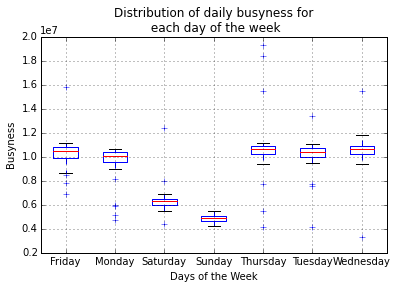

In [330]:
# Plot the boxplots of the days

data_day=days.reset_index()
data_day.columns=['DAY','BUSYNESS']
fig = plt.figure(figsize=(20, 10))
data_day.boxplot(column='BUSYNESS',by='DAY')
plt.xlabel('Days of the Week', fontsize=10)
plt.ylabel('Busyness')
plt.title('Distribution of daily busyness for\n each day of the week')
plt.suptitle("")

We clearly see now that Saturday and Sunday are the days on which stations are not operated at full-capacity. 

To have a better idea, we can plot the daily usage in 2013 :

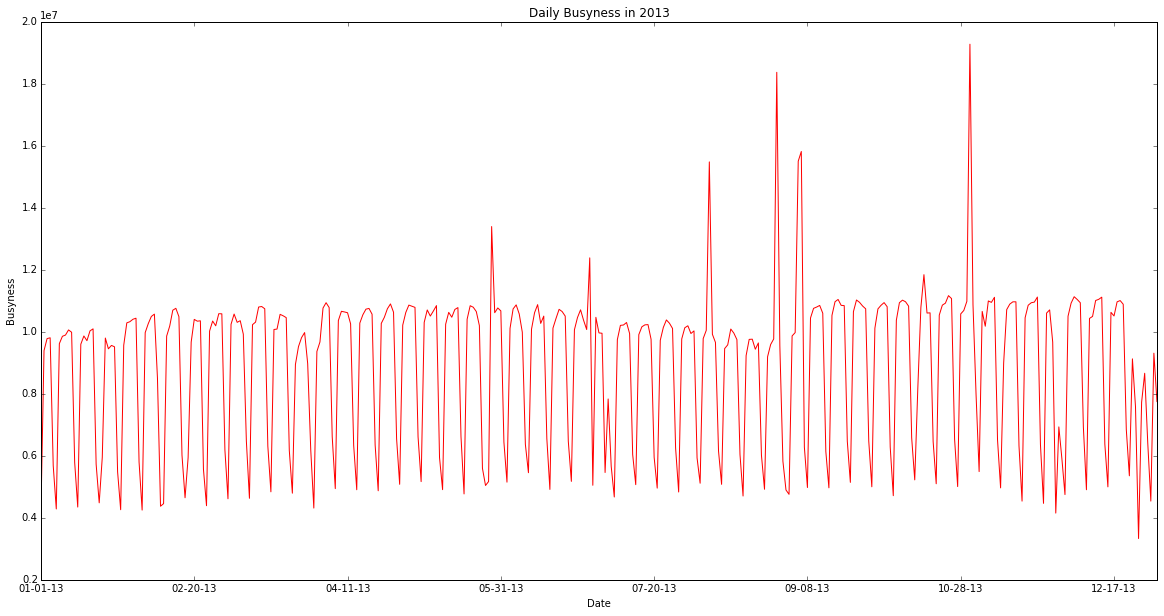

In [333]:
# Plot the daily busyness in 2013

#calendar2013=data2013.sort('DATE').groupby('DATE').BUSYNESS.sum()
fig = plt.figure(figsize=(20, 10))
calendar2013.plot(color='red')
plt.xlabel('Date', fontsize=10)
plt.ylabel('Busyness')
plt.title('Daily Busyness in 2013')

The plot behaves like a periodic signal. The minimum values are during the weekends.

# VISUALIZATION

## 1. Plot the daily row counts for data files in Q3 2013

What can a daily row count reveal ? At first glance, a day with many row counts means it has a lot of information. 

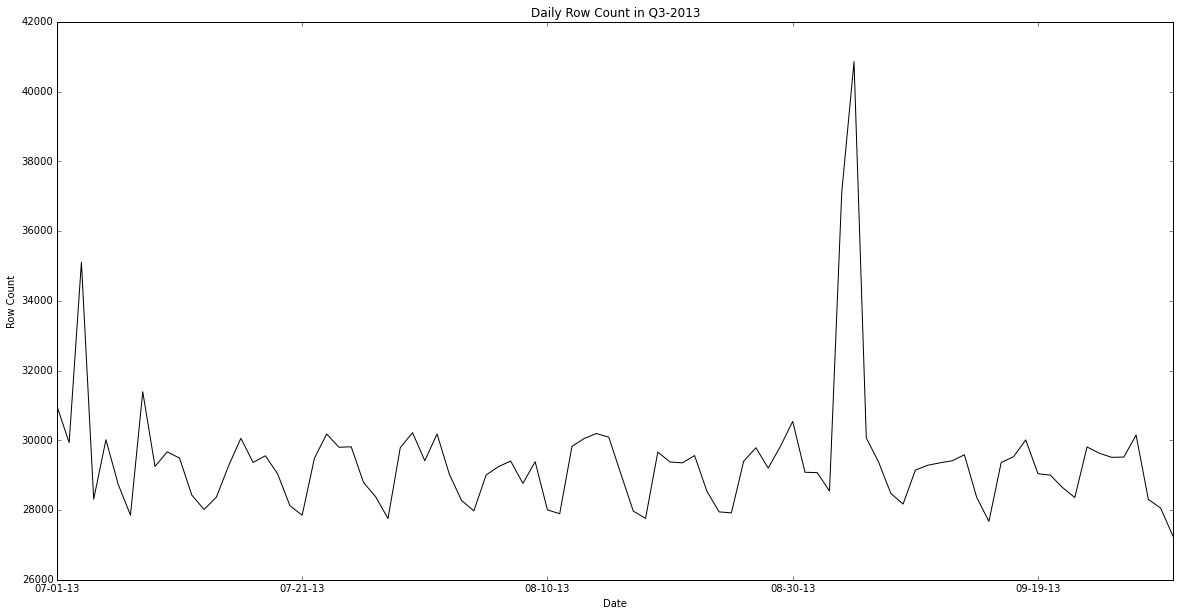

In [358]:
# Plot the daily row count
fig = plt.figure(figsize=(20, 10))
data2013Q3 =data2013Q3[data2013Q3.DATE!="10-01-13"] 
data2013Q3.groupby('DATE').BUSYNESS.count().plot(color='black')
plt.xlabel('Date', fontsize=10)
plt.ylabel('Row Count')
plt.title('Daily Row Count in Q3-2013')

There are two peaks. The first one is during July 4th, the Independence Day. The second peaks is surprisingly during 09-04-13.

## 2. Plot the daily total number of entries & exits across the system for Q3 2013.

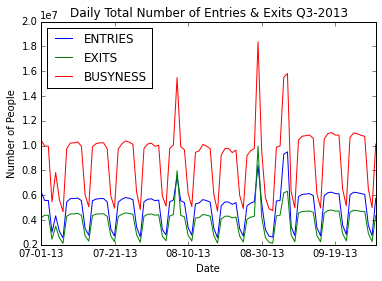

In [381]:
# Plot the daily total number of entries & exits Q32013
fig = plt.figure(figsize=(30, 10))
data2013Q3.groupby('DATE')[['intENTRIES','intEXITS','BUSYNESS']].sum().plot()
plt.xlabel('Date', fontsize=10)
plt.ylabel('Number of People')
plt.title('Daily Total Number of Entries & Exits Q3-2013')
plt.legend(['ENTRIES','EXITS','BUSYNESS'],loc=2)

Again, the signal is periodic. Let's identify the peaks : 

In [369]:
data2013Q3.groupby('DATE').BUSYNESS.sum().order(ascending=False)[:4]

DATE
08-29-13    18370984
09-06-13    15816431
09-05-13    15504731
08-07-13    15481175
Name: BUSYNESS, dtype: float64

The first peak on the left is for July 4th. The second one is in 08-07-13. There two other ones in 08-29-13 and 09-05-13. 

Most of these peaks happen during the summer holidays, a period when a lot of tourists come to visit New York. However we were expecting July 4th to be the busiest day in Q3.

## 3. Plot the mean and standard deviation of the daily total number of entries & exits for each month in Q3 2013 for station 34 ST-PENN STA.

We consider here all the Penn Stations, no matter what their lines are.

In [370]:
# Data of PENN STATION during Q3
dataQ3PENN=data2013Q3[data2013Q3.STATION=="34 ST-PENN STA"]

We need to plot for each month :

/Users/michaelweilMichael/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


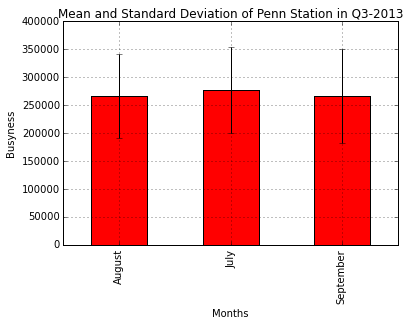

In [382]:
# Plot the mean and standard deviation for each month
totalPENN=dataQ3PENN.groupby('DATE')['BUSYNESS'].sum()
totalPENN.index=pd.to_datetime(totalPENN.index)
totalPENN=totalPENN.rename(index=lambda x: x.strftime('%B'))
month=pd.DataFrame({'Month':totalPENN.index,'BUSYNESS':totalPENN.values})
meanPENN=month.groupby('Month').BUSYNESS.mean()
stdPENN=month.groupby('Month').BUSYNESS.std()
fig, ax = plt.subplots()
meanPENN.plot(yerr=stdPENN, kind='bar',ax=ax,color='red',grid=True)
plt.xlabel('Months', fontsize=10)
plt.ylabel('Busyness')
plt.title('Mean and Standard Deviation of Penn Station in Q3-2013')

The distributions are quite the same for each month.

## 4. Plot 25/50/75 percentile of the daily total number of entries & exits for each month in Q3 2013 for station 34 ST-PENN STA.

We just need to plot the box plots, the first quartile, median and third quartile are in the box :  

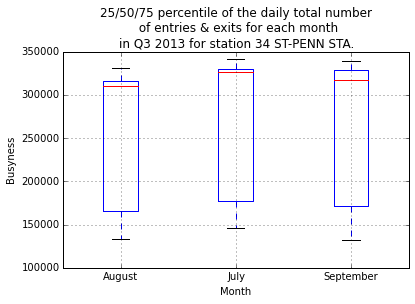

In [389]:
# Plot the boxplots
month.boxplot(column='BUSYNESS',by='Month')
plt.title('25/50/75 percentile of the daily total number \n of entries & exits for each month \nin Q3 2013 for station 34 ST-PENN STA.')
plt.ylabel('Busyness')
plt.suptitle("")

## 5. Plot the daily number of closed stations and number of stations that were not operating at full capacity in Q3 2013.

We need to define what a closed station and a station not operating at full capacity are.

A very strict definition of a closed station is a station where there are no entries and exits. Actually we will have a soft definition by considering stations that, for instance, have less than 200 entries & exits to be closed.

A under capacity station will be a station where its number of entries and exits is above 200 but is in the first quartile of its distribution during Q3.

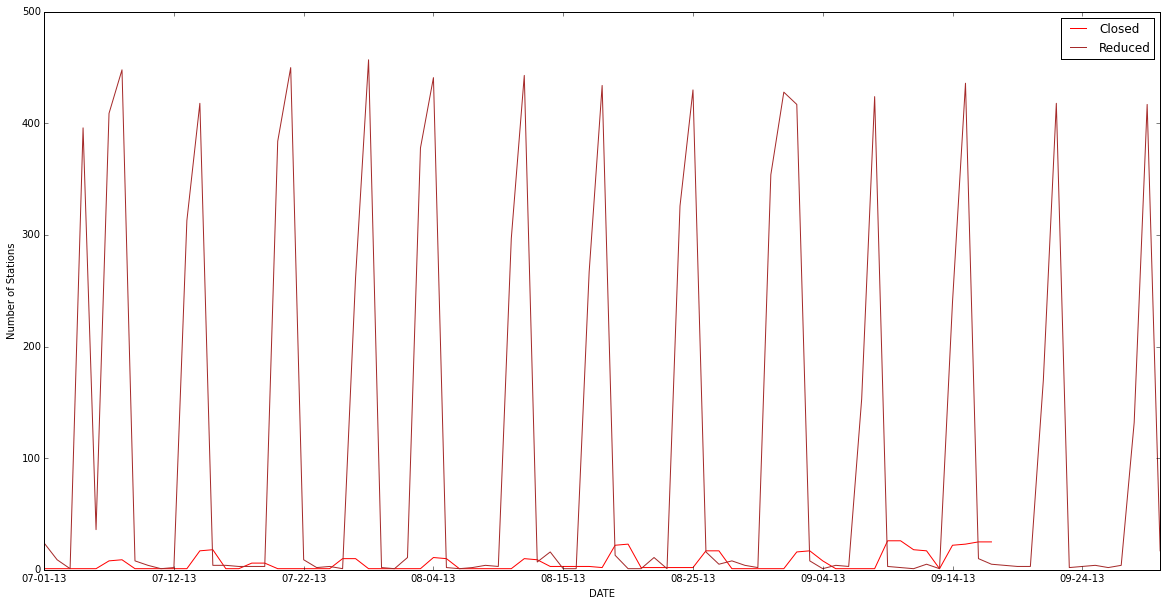

In [473]:
# Plot closed and reduced station
data=data2013Q3.groupby(['DATE','STATION','LINENAME']).BUSYNESS.sum().reset_index()

# Get quartile
dataquartile=data.groupby(['STATION','LINENAME']).BUSYNESS.quantile(.25).reset_index()
dataquartile.columns=[['STATION','LINENAME','QUARTILE']]
data=pd.merge(data,dataquartile,how='left',on=['STATION','LINENAME'])

# Closed stations
closed=data[data.BUSYNESS<=200].groupby('DATE').STATION.size()

# Reduced stations
reduced=data[(data.BUSYNESS>200)&(data.BUSYNESS<=data.QUARTILE)].groupby('DATE').STATION.size()


fig = plt.figure(figsize=(20, 10))
closed.plot(color='red')
reduced.plot(color='brown')
plt.legend(['Closed','Reduced'])
plt.ylabel('Number of Stations')

Again, we notice that during the weekends the stations are under capacity.

# 3. Bonus : Visualization on a map

In this part, we will try to visualize stations' entries and exits on an interactive map. For simplicity, we will group stations by their names and not by their line names.

First of all, we need to get the coordinates of the stations. Such information can be found on this dataset : https://data.ny.gov/Transportation/NYC-Transit-Subway-Entrance-And-Exit-Data/i9wp-a4ja

In [477]:
# Load the coordinates dataset
data_coor_url="https://data.ny.gov/api/views/i9wp-a4ja/rows.csv?accessType=DOWNLOAD"
data_coor_csv=ul.urlopen(coor_station_url,timeout=5)
data_coor=pd.read_csv(coor_station_url)[['Station Name','Station Latitude','Station Longitude']]
data_coor['Station Name']=data_coor['Station Name'].str.upper()
data_coor=data_coor.groupby('Station Name').first().reset_index()
data_coor

,Station Name,Station Latitude,Station Longitude
0,103RD ST,40.796092,-73.961454
1,104TH ST-102ND ST,40.695178,-73.844330
2,104TH ST-OXFORD AV,40.681711,-73.837683
3,110TH ST,40.795020,-73.944250
4,110TH ST-CENTRAL PARK NORTH,40.799075,-73.951822
5,111TH ST,40.697418,-73.836345
6,111TH ST-GREENWOOD AV,40.684331,-73.832163
7,116TH ST,40.805085,-73.954882
8,116TH ST-COLUMBIA UNIVERSITY,40.807722,-73.964110
9,121ST ST,40.700492,-73.828294


There is a problem : most of the stations' names on this dataset are not exactly the same as the ones on the turnstile dataset. To deal with this issue, we are going  to perform sequencematching between the names thanks to the module *difflib*.

In [481]:
# Functions that returns the station and the coordinates of the row 
# that has the highest sequence matching ratio
def get_stat(stat):
    ratios=data_coor['Station Name'].apply(lambda x : sm(None,stat,x).ratio())
    j=np.argmax(ratios)
    ans=data_coor.loc[j,['Station Name','Station Latitude','Station Longitude']]
    ans['ratio']=max(ratios)
    return(ans)

Now let's see the results of the matching : 

In [484]:
# Force Times Square, Grand Central and Penn Station to match : 
data_coor=data_coor.replace({'TIMES SQUARE' : '42 ST-TIMES SQ','GRAND CENTRAL-42ND ST':'42 ST-GRD CNTRL','34TH ST':'34 ST-PENN STA' })
Stationbooth=pd.DataFrame(data_booth.Station.unique(),columns=['STATION'])
StationCoordinates=pd.concat([Stationbooth.STATION,Stationbooth.STATION.apply(get_stat)],axis=1)
StationCoordinates


,STATION,Station Name,Station Latitude,Station Longitude,ratio
0,WHITEHALL ST,WHITEHALL ST,40.703087,-74.012994,1.000000
1,SOUTH FERRY,SOUTH FERRY,40.702068,-74.013664,1.000000
2,FULTON ST,FULTON ST,40.709416,-74.006571,1.000000
3,CYPRESS HILLS,CYPRESS HILLS,40.689941,-73.872550,1.000000
4,ELDERTS LANE,ELDERTS LANE-75TH ST,40.691324,-73.867139,0.750000
5,FOREST PARKWAY,FOREST PARKWAY-85TH ST,40.692435,-73.860010,0.777778
6,WOODHAVEN BLVD,WOODHAVEN BLVD,40.693879,-73.851576,1.000000
7,104 ST,14TH ST,40.738228,-73.996209,0.769231
8,111 ST,111TH ST,40.697418,-73.836345,0.857143
9,121 ST,121ST ST,40.700492,-73.828294,0.857143


With strong confidence, the sations having a ratio higher than 0.8 match.

In [540]:
# Keep the stations with a ratio higher than 0.8
StationCoordinates=StationCoordinates[StationCoordinates.ratio>=0.8].sort('STATION')

# Create some dictionaries STATION-->Coordinates
names=list(zip(StationCoordinates.STATION,StationCoordinates.STATION))
dic=StationCoordinates.set_index('STATION')[['Station Latitude','Station Longitude']].T.to_dict('list')
dic['None']=[40.75,-74.0]


[40.75, -74.0]

Next, by using the module Folium we are going display on a NYC map 3  circles markers ENTRIES,EXITS, BUSYNESS for each station between two chosen dates. The radius of a marker is proportional to its value. The color code is : GREEN-->ENTRIES, RED-->EXITS, BLUE-->BUSYNESS.
Also, we let the possibility to focus on a given station.

In [545]:
def vizualize_map (Date,Date2,Station):
    
    # Load the data
    data=load_and_clean(Date,Date2)
    total=data.groupby('STATION')[['intENTRIES','intEXITS','BUSYNESS']].sum().reset_index()
    total=pd.merge(total,StationCoordinates,how='left',on='STATION').dropna()
    total.index=np.arange(len(total))
    # Normalize the entries, exits and total
    x=total[['intENTRIES','intEXITS','BUSYNESS']].values.astype(int)
    x_scaled = normalize(x[:,:2], axis=0, norm='l1')*2000
    
    # We can zoom on a desired station at the beginning
    info = dic[Station]
    if (Station=='None'):
        zoom = 12
    else:
        zoom = 16
    
    # Create the map
    map_osm = folium.Map(location=info,zoom_start=zoom)
    colors=['#31cc77','#cc3138']
    popups=['Entries for ','Exits for ']
    
    
    # Create the circle markes
    print('Creating Markers for Map...')
    for i in total.index:
        #print(i)
        values=x[i]
        radius=x_scaled[i]
        j=np.argmax(radius[:2])
        
        # Business circle markers
        folium.CircleMarker(total.loc[i,['Station Latitude','Station Longitude']].values,
                    radius=radius[0]+radius[1],
                    popup='Usage for '+total.loc[i,'STATION']+" : \n"+str(values[0]+values[1]),
                    color='#3186cc',
                    fill_color='#3186cc',
                   ).add_to(map_osm)
        
        # Entries & exits circle markers
        folium.CircleMarker(total.loc[i,['Station Latitude','Station Longitude']].values,
                    radius=radius[j],
                    popup=popups[j]+total.loc[i,'STATION']+" : \n"+str(values[j]),
                    color=colors[j],
                    fill_color=colors[j],
                   ).add_to(map_osm)
        k=(j+1)%2
        folium.CircleMarker(total.loc[i,['Station Latitude','Station Longitude']].values,
                    radius=radius[k],
                    popup=popups[k]+total.loc[i,'STATION']+" : \n"+str(values[k]),
                    color=colors[k],
                    fill_color=colors[k],
                   ).add_to(map_osm)
    print('Done')
    # If station selected, plot a daily count graph.
    if(Station!='None'):
        fig = plt.figure(figsize=(20, 10))
        data[data.STATION==Station].groupby('DATE')[['intENTRIES','intEXITS']].sum().plot(color=['green','red'])
        plt.legend(['ENTRIES','EXITS'])
        plt.title('Daily Entries & Exits for Station '+Station)
    
    return(map_osm)

Here is an demo :

In [547]:
vizualize_map('08-01-2013','08-02-2013',"None")

Getting the data
Done


/Users/michaelweilMichael/anaconda/lib/python3.4/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by the normalize function.
  warnings.warn(msg, DataConversionWarning)


Creating Markers for Map...
Done


This widget below enables us to easily select the inputs.
### Remark  :  The widget cannot be displayed on the .html notebook. If you want to, I can email you the .ipynb file.

Getting the data
Done


/Users/michaelweilMichael/anaconda/lib/python3.4/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by the normalize function.
  warnings.warn(msg, DataConversionWarning)


Creating Markers for Map...
Done


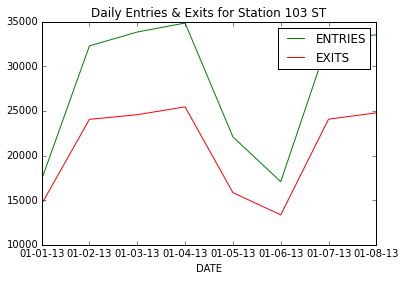

In [546]:
from ipywidgets import widgets
from IPython.display import display
d1 = date(2010, 5, 10)
d2 = date(2014, 5, 14)
delta = d2 - d1
daterange = [dt.strftime(d1 + td(days=i),'%m-%d-%Y') for i in range(delta.days + 1)]
Station = widgets.Dropdown(
    options=names,
    
    description='Station',
)

slide=widgets.SelectionSlider(
    description='Select Start Date',
    options=daterange,
    value='01-01-2013',
)


slide2=widgets.SelectionSlider(
    description='Select End Date',
    options=daterange,
    value='01-01-2014',
)
def slide_change(sender):
    val1=date_to_int(slide.value)
    val2=date_to_int(slide2.value)
    if (val1>val2):
        slide2.value=slide.value
slide.observe(slide_change)

def slide_change2(sender):
    val1=date_to_int(slide.value)
    val2=date_to_int(slide2.value)
    if (val1>val2):
        slide.value=slide2.value
slide2.observe(slide_change2)

button=widgets.Button(description='Visualize!')
display(slide)
display(slide2)
display(Station)
display(button)
def handle_submit(sender):
    mapviz=vizualize_map(slide.value,slide2.value,Station.value)
    display(mapviz)
button.border_radius='10'
button.color='white'
button.background_color='green'

button.on_click(handle_submit)

    

Improvements still need to be made : 
1. Speed : the process takes time for two reasons
  * Loading the data : this can be solve if we load all the available data at once before using the map.
  * Creating the markers : the function performs a for loop in order to create the markers. We need to *vectorize* the process.
2. More interactivity : Folium enables us to drag the map on any locations. Ideally the next step will be to interact with the dates. For instance, we can put a double side bar in order to directly pick the dates. However, the folium circle markers seem to be static : the radius cannot be updated.

This visualization would make possible to better understand the turnstile dataset. One of the applications can be for instance clusters detection. 